# Dimensionality reduction for data visualization

In [4]:
import os
os.chdir("..")

In [23]:
import pandas as pd
import numpy as np
import sklearn.feature_selection as fs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
hcc_smarts_df = pd.read_csv("data/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt", sep = " ")
mcf_smarts_df = pd.read_csv("data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt", sep= " ")

In [25]:
from fix_data import add_label_T
hcc_smarts_df = add_label_T(hcc_smarts_df)
mcf_smarts_df = add_label_T(mcf_smarts_df)

X1 = hcc_smarts_df.loc[:,hcc_smarts_df.columns!='label']
X2 = mcf_smarts_df.loc[:,mcf_smarts_df.columns!='label']


In [26]:
# Instantiate VarianceThreshold object
threshold = 0.05
selector = fs.VarianceThreshold(threshold)

# Fit selector to DataFrame
selector.fit(hcc_smarts_df)

# Get boolean mask of features that meet threshold
mask = selector.get_support()

# Get list of column names that meet threshold
near_zero_var_cols = hcc_smarts_df.columns[~mask].tolist()

# Print the result
print(f'Columns with < {threshold} variance: {near_zero_var_cols}')
print(f"In total: {len(near_zero_var_cols)}")

Columns with < 0.05 variance: ['CICP3', 'MIR6726', 'NDUFB4P8', 'MMP23A', 'RPL7P11', 'RPL23AP19', 'MZT1P1', 'LINC01647', 'DRAXIN', 'SBF1P2', 'HNRNPCL3', 'BRWD1P1', 'CELA2B', 'CLCNKA', 'RNU6-1099P', 'HSPE1P27', 'PPP1R11P1', 'NBPF2P', 'PFN1P10', 'CDC42-IT1', 'BTBD6P1', 'MIR6731', 'LIN28A', 'RPL12P13', 'OSTCP2', 'RPEP3', 'SNORA16A', 'CSMD2-AS1', 'EFCAB14P1', 'MKRN8P', 'HMGB1P48', 'NENFP1', 'ZNF859P', 'FCF1P6', 'GAPDHP51', 'ANAPC10P1', 'NDUFS5P3', 'HNRNPA3P12', 'GYG1P3', 'LINC01748', 'SLC2A3P2', 'MIR3671', 'MRPS21P1', 'DNAJB6P4', 'HNRNPCP9', 'TXNP2', 'CASP3P1', 'MSH4', 'NSRP1P1', 'HNRNPA1P64', 'HNRNPA3P14', 'ST13P20', 'LINC01361', 'PKN2-AS1', 'GBP1P1', 'GAPDHP46', 'ACTBP12', 'ALG14-AS1', 'UBE2WP1', 'FTLP17', 'NBPF6', 'RANP5', 'GSTM1', 'HIGD1AP12', 'AKR7A2P1', 'PTPN22', 'EIF2S2P5', 'RNY1P13', 'CNOT7P2', 'HNRNPA1P43', 'NEFHP1', 'VTCN1', 'VPS25P1', 'PSMC1P12', 'GAPDHP74', 'PPIAL4A', 'LINC01691', 'PFN1P12', 'H2BP2', 'PFN1P3', 'MIR6736', 'ITGA10', 'NUDT4P2', 'RNVU1-29', 'PFN1P8', 'PFN1P4', 'H4C1

# hcc_smarts_df

### PCA 2 components

In [27]:
pca = PCA(n_components=2)
pca.fit(X1)

print(sum(pca.explained_variance_ratio_))
red_X1 = pd.DataFrame(pca.transform(X1))
red_X1


0.6046467992047815


,0,1
0,8508.231537,6572.525591
1,66982.567454,-34314.867498
2,-56024.107315,7548.406874
3,53124.609960,-43416.533949
4,-35092.681963,10995.846102
...,...,...
238,-5887.971793,-14855.195556
239,-43546.752863,776.491785
240,19297.497843,-11357.496107
241,-40565.267959,2338.182897


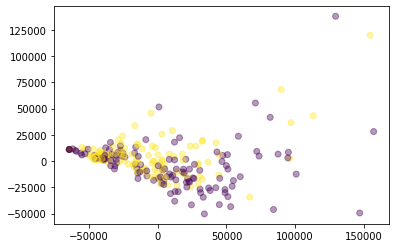

In [28]:
y = hcc_smarts_df["label"]
plt.scatter(red_X1[0], red_X1[1], alpha=0.4, c=y)

### Multidimensional Scaling (MDS)
reduces dimensionality while trying to preserve
the distances between the instances.

In [29]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X1)

c:\Users\Samuele\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


### Isomap 
creates a graph by connecting each instance to its nearest neighbors, then
reduces dimensionality while trying to preserve the geodesic distances between
the instances.

In [30]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X1)

### t-Distributed Stochastic Neighbor Embedding (t-SNE) 
reduces dimensionality
while trying to keep similar instances close and dissimilar instances apart. It is
mostly used for visualization, in particular to visualize clusters of instances in
high-dimensional space (e.g., to visualize the MNIST images in 2D).

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X1)

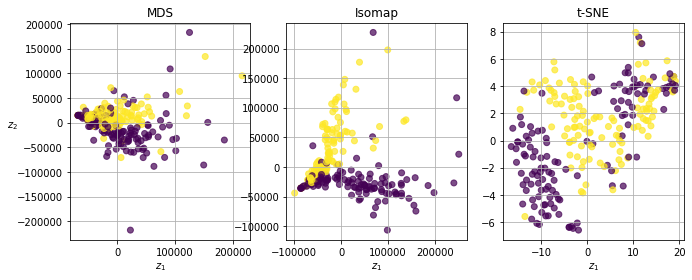

In [32]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.7)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.show()

### Kernel PCA (Linear, Rbf, Sigmoid)

In [33]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, random_state=42)
X_reduced = rbf_pca.fit_transform(X1)

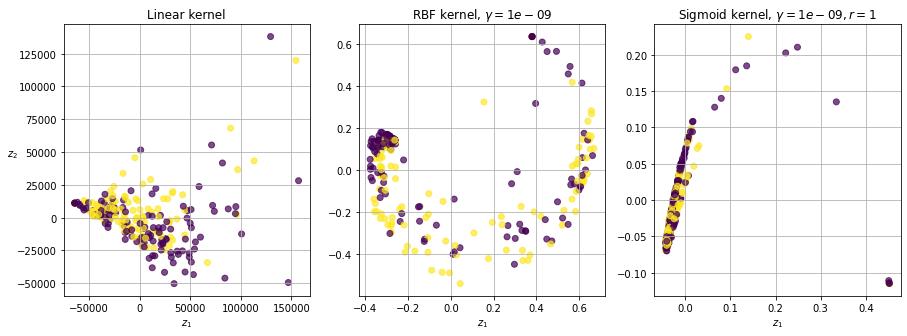

In [34]:
lin_pca = KernelPCA(kernel="linear")
rbf_pca = KernelPCA(kernel="rbf", gamma=0.000000001)
sig_pca = KernelPCA(kernel="sigmoid", gamma=0.000000001, coef0=1)

kernel_pcas = ((lin_pca, "Linear kernel"),
               (rbf_pca, rf"RBF kernel, $\gamma={rbf_pca.gamma}$"),
               (sig_pca, rf"Sigmoid kernel, $\gamma={sig_pca.gamma}, r={sig_pca.coef0}$"))

plt.figure(figsize=(15, 5))
for idx, (kpca, title) in enumerate(kernel_pcas):
    kpca.n_components = 2
    kpca.random_state = 42
    X_reduced = kpca.fit_transform(X1)

    plt.subplot(1, 3, idx + 1)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.7)
    plt.xlabel("$z_1$")
    if idx == 0:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid()

plt.show()

In [35]:
## gridsearch to find best gamma for kernel pca

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
 ("kpca", KernelPCA(n_components=2)),
 ("log_reg", LogisticRegression())
 ])

param_grid = [{
 "kpca__gamma": np.linspace(0.0000000000007, 0.0000003, 10),
 "kpca__kernel": ["rbf", "sigmoid"]
 }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X1, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([7.00000000e-13, 3.33339556e-08, 6.66672111e-08, 1.00000467e-07,
       1.33333722e-07, 1.66666978e-07, 2.00000233e-07, 2.33333489e-07,
       2.66666744e-07, 3.00000000e-07]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [36]:
grid_search.best_params_

{'kpca__gamma': 7e-13, 'kpca__kernel': 'sigmoid'}

### Locally Linear Embedding

In [37]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X1)

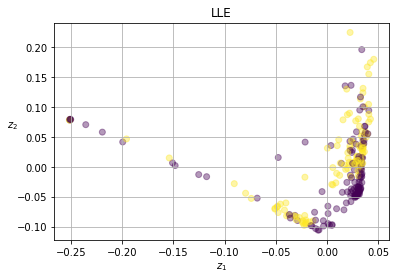

In [38]:
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=y, alpha=0.4)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)

plt.grid(True)

plt.title("LLE")
plt.show()

# mcf_smarts_df
### PCA 2 components 

In [39]:
pca = PCA(n_components=2)
pca.fit(X2)

print(sum(pca.explained_variance_ratio_))
red_X2 = pd.DataFrame(pca.transform(X2))
red_X2

0.7066303312208577


,0,1
0,13131.081856,-12716.489155
1,-47422.754025,-24042.707166
2,94682.412774,-3885.918848
3,-46804.508372,-23673.963171
4,-37054.766246,-10017.024374
...,...,...
378,-30423.989675,258.437947
379,-5965.250695,102.228087
380,4265.961618,-21684.709634
381,41724.822448,-23590.325613


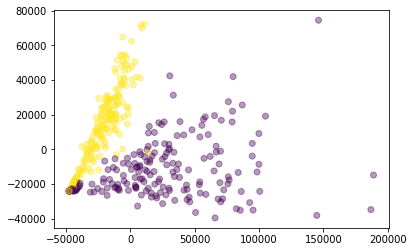

In [40]:
y = mcf_smarts_df["label"]
plt.scatter(red_X2[0], red_X2[1], alpha=0.4, c=y)

### Multidimensional Scaling (MDS)
reduces dimensionality while trying to preserve
the distances between the instances.

In [41]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X2)

c:\Users\Samuele\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


### Isomap 
creates a graph by connecting each instance to its nearest neighbors, then
reduces dimensionality while trying to preserve the geodesic distances between
the instances.

In [42]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X2)

### t-Distributed Stochastic Neighbor Embedding (t-SNE) 
reduces dimensionality
while trying to keep similar instances close and dissimilar instances apart. It is
mostly used for visualization, in particular to visualize clusters of instances in
high-dimensional space (e.g., to visualize the MNIST images in 2D).

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X2)

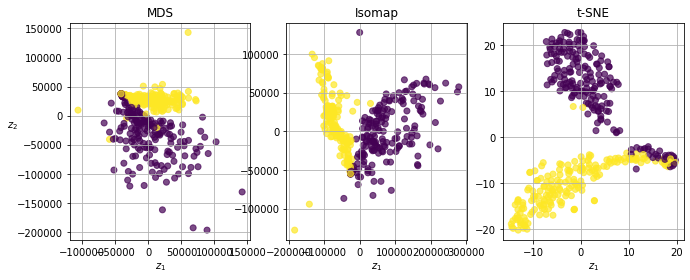

In [44]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.7)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.show()

### Kernel PCA (Linear, Rbf, Sigmoid)

In [45]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, random_state=42)
X_reduced = rbf_pca.fit_transform(X2)

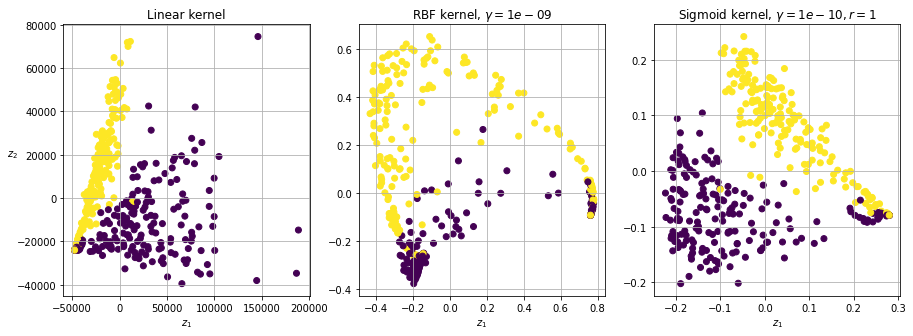

In [46]:
lin_pca = KernelPCA(kernel="linear")
rbf_pca = KernelPCA(kernel="rbf", gamma=0.000000001)
sig_pca = KernelPCA(kernel="sigmoid", gamma=0.0000000001, coef0=1)

kernel_pcas = ((lin_pca, "Linear kernel"),
               (rbf_pca, rf"RBF kernel, $\gamma={rbf_pca.gamma}$"),
               (sig_pca, rf"Sigmoid kernel, $\gamma={sig_pca.gamma}, r={sig_pca.coef0}$"))

plt.figure(figsize=(15, 5))
for idx, (kpca, title) in enumerate(kernel_pcas):
    kpca.n_components = 2
    kpca.random_state = 42
    X_reduced = kpca.fit_transform(X2)

    plt.subplot(1, 3, idx + 1)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=1)
    plt.xlabel("$z_1$")
    if idx == 0:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid()

plt.show()

In [47]:
## gridsearch to find best gamma for kernel pca

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
 ("kpca", KernelPCA(n_components=2)),
 ("log_reg", LogisticRegression())
 ])

param_grid = [{
 "kpca__gamma": np.linspace(0.0000000000007, 0.0000003, 10),
 "kpca__kernel": ["rbf", "sigmoid"]
 }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X2, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([7.00000000e-13, 3.33339556e-08, 6.66672111e-08, 1.00000467e-07,
       1.33333722e-07, 1.66666978e-07, 2.00000233e-07, 2.33333489e-07,
       2.66666744e-07, 3.00000000e-07]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [48]:
grid_search.best_params_

{'kpca__gamma': 7e-13, 'kpca__kernel': 'rbf'}

### Locally Linear Embedding

In [49]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X2)

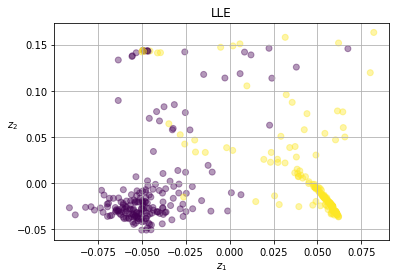

In [50]:
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=y, alpha=0.4)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)

plt.grid(True)

plt.title("LLE")
plt.show()

# Dropseq

In [2]:
def name_to_label(name):
    if "orm" in name: return 1
    elif "ypo" in name: return 0
    else: raise Exception

def add_label_T(df):
    df = df.T
    df["label"] = (df.index).map(name_to_label)
    return df
hcc_drops_df = pd.read_csv("../data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt", sep= " ")
mcf_drops_df = pd.read_csv("../data/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt", sep=" ")

hcc_drops_df = add_label_T(hcc_drops_df)
mcf_drops_df = add_label_T(mcf_drops_df)

X1D = hcc_drops_df.loc[:,hcc_drops_df.columns!='label']
X2D = mcf_drops_df.loc[:,mcf_drops_df.columns!='label']


### PCA 2 Components

In [4]:
pca = PCA(n_components=2)
pca.fit(X2D)

print(sum(pca.explained_variance_ratio_))
red_X2D = pd.DataFrame(pca.transform(X2D))
red_X2D

0.33575711990640356


,0,1
0,-2.429843,-0.939195
1,0.051804,-1.966959
2,0.150210,-2.236822
3,3.458502,-2.619389
4,1.832195,-3.690200
...,...,...
21621,-5.029304,2.749482
21622,-4.737798,5.576570
21623,-6.437728,6.866357
21624,-3.296984,-1.180840


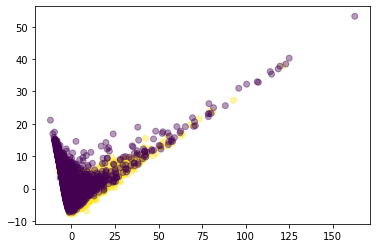

In [5]:
y = mcf_drops_df["label"]
plt.scatter(red_X2D[0], red_X2D[1], alpha=0.4, c=y)

### Isomap 
creates a graph by connecting each instance to its nearest neighbors, then
reduces dimensionality while trying to preserve the geodesic distances between
the instances.

In [85]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X2D)

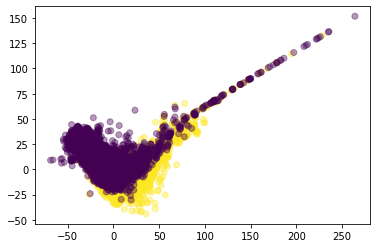

In [88]:
plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], c=y, alpha=0.4)

### t-Distributed Stochastic Neighbor Embedding (t-SNE) 
reduces dimensionality
while trying to keep similar instances close and dissimilar instances apart. It is
mostly used for visualization, in particular to visualize clusters of instances in
high-dimensional space (e.g., to visualize the MNIST images in 2D).

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X2D)

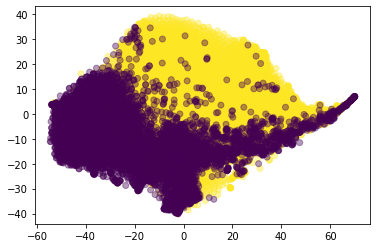

In [9]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, alpha=0.4)